In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from models import WeightedLasso
from utils.ode import lorenz, hydrogen_bromine, hydrogen_bromine_init, map_equation, rober, rober_init
import pickle as pkl

from scipy.integrate import solve_ivp

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
dt = 0.002
x0_train = hydrogen_bromine_init
t_train = np.arange(0, 5, dt)
t_train_span = (t_train[0], t_train[-1])

data = solve_ivp(
    hydrogen_bromine,
    t_train_span,
    x0_train,
    rtol=1e-12,
    atol=1e-12,
    method='LSODA',
    t_eval=t_train,
)

X = data.y.T

print("Generated X shape:", X.shape)
print("t_train shape:", t_train.shape)

Generated X shape: (105, 6)
t_train shape: (2500,)


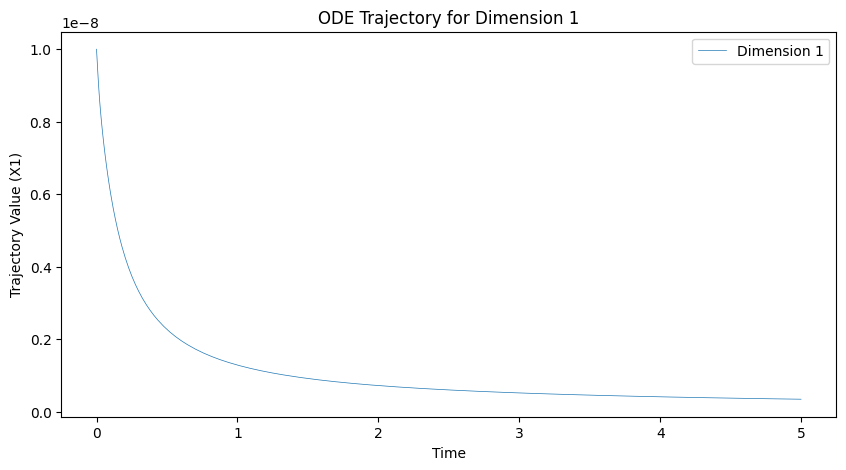

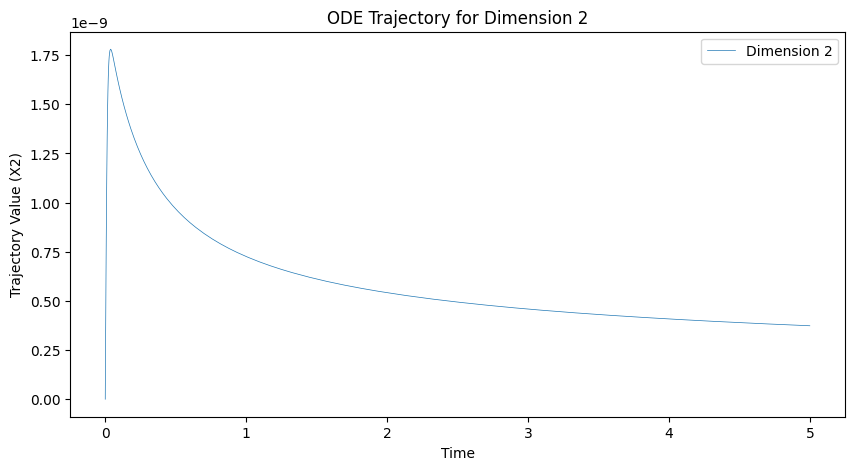

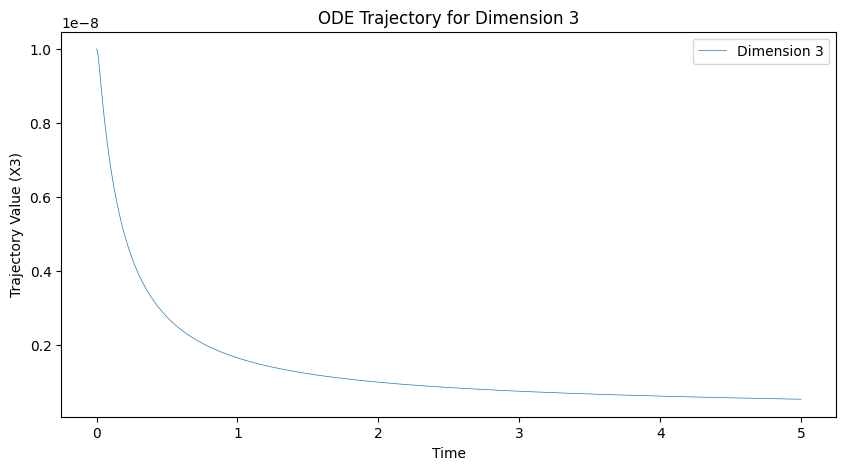

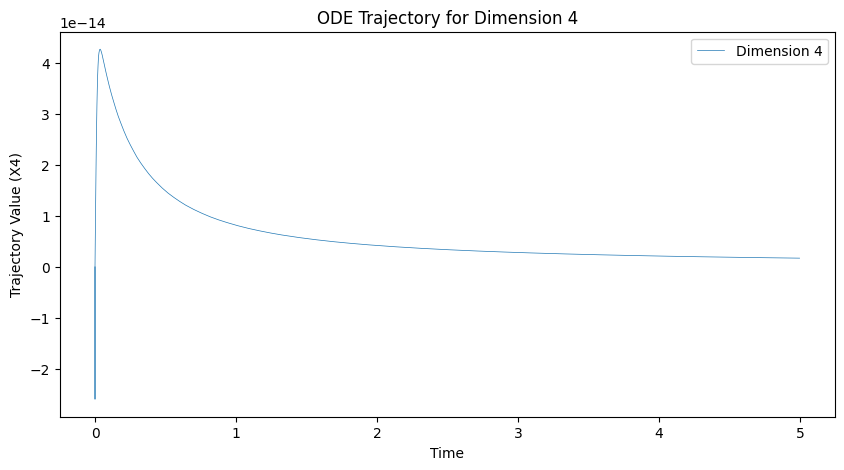

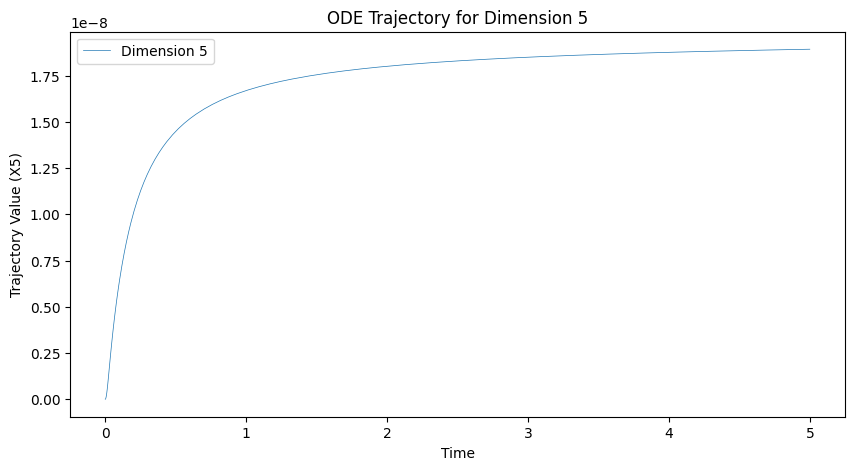

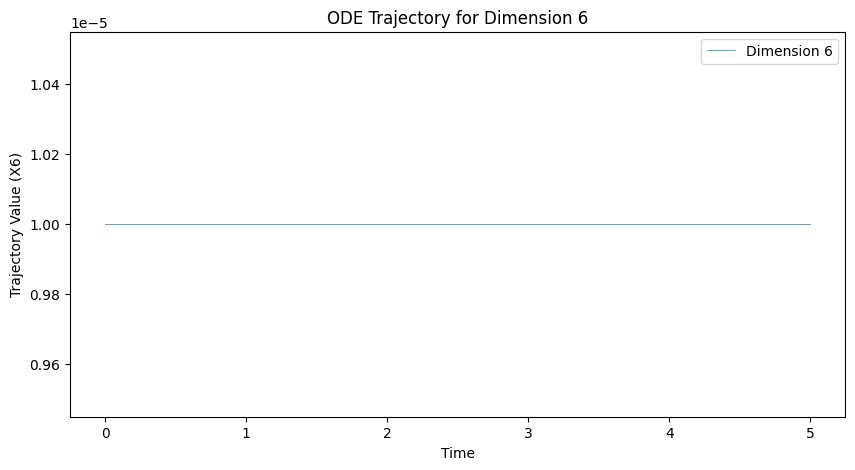

In [92]:
for i in range(X.shape[1]):
    plt.figure(figsize=(10, 5))
    # plt.plot(t_train, X[:, i], label=f"Dimension {i+1}", lw=0.5)
    plt.plot(data.t, X[:, i], label=f"Dimension {i+1}", lw=0.5)
    plt.xlabel("Time")
    plt.ylabel(f"Trajectory Value (X{i+1})")
    plt.title(f"ODE Trajectory for Dimension {i+1}")
    plt.legend()
    plt.show()

In [117]:
model = pkl.load(open("../experiments/results/hbr_20250924-120317/5_model.pkl", "rb"))

In [118]:
library = ps.PolynomialLibrary(degree=3)
library.fit(X)

,degree,3
,include_interaction,True
,interaction_only,False
,include_bias,True
,order,'C'


In [119]:
# model.coefficients()

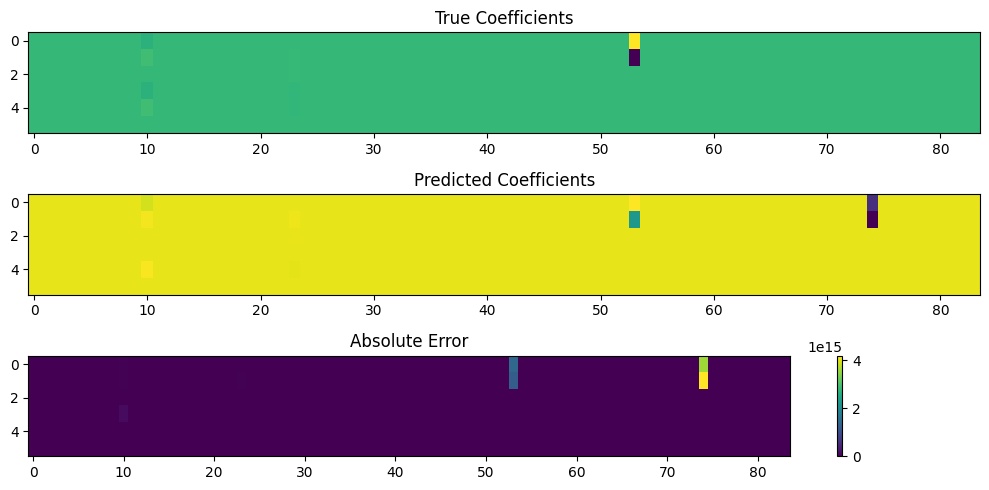

In [120]:
true_coef = map_equation(hydrogen_bromine, library)
pred_coef = model.coefficients()

plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 1)
plt.imshow(true_coef, cmap='viridis', aspect='auto')
plt.title("True Coefficients")
plt.subplot(3, 1, 2)
plt.imshow(pred_coef, cmap='viridis', aspect='auto')
plt.title("Predicted Coefficients")
plt.subplot(3, 1, 3)
plt.imshow(np.abs(true_coef - pred_coef), cmap='viridis', aspect='auto')
plt.title("Absolute Error")
plt.colorbar()
plt.tight_layout()
plt.show()


In [121]:
simulated_data = model.simulate(X[0], t_train)

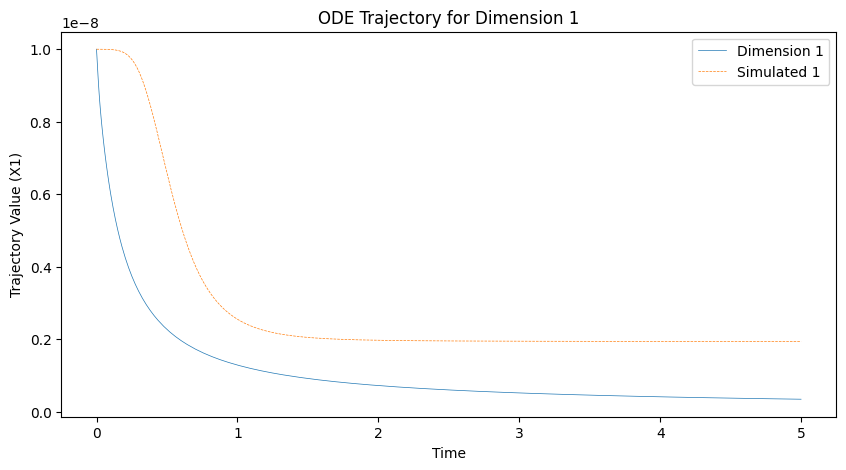

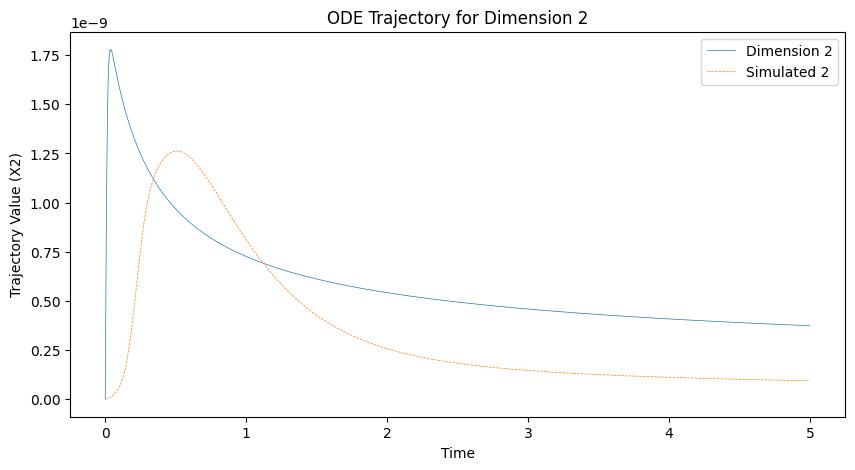

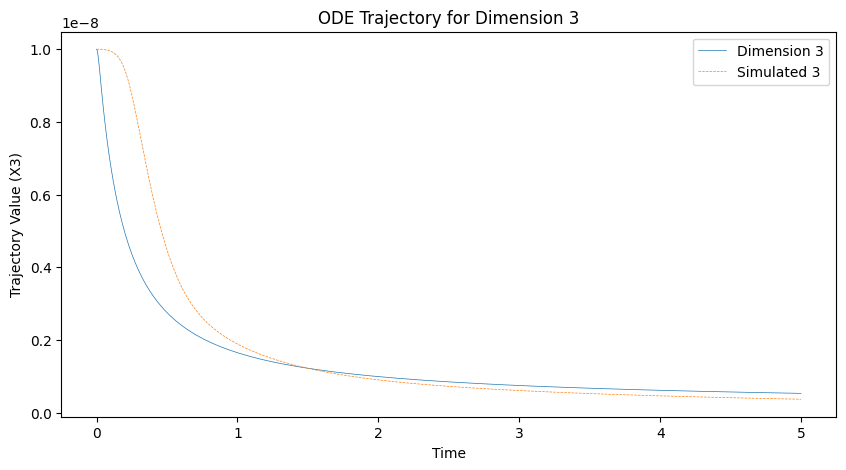

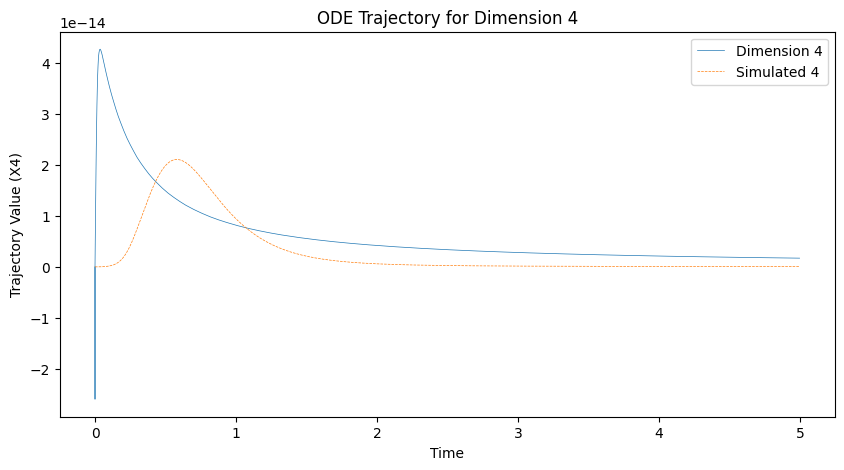

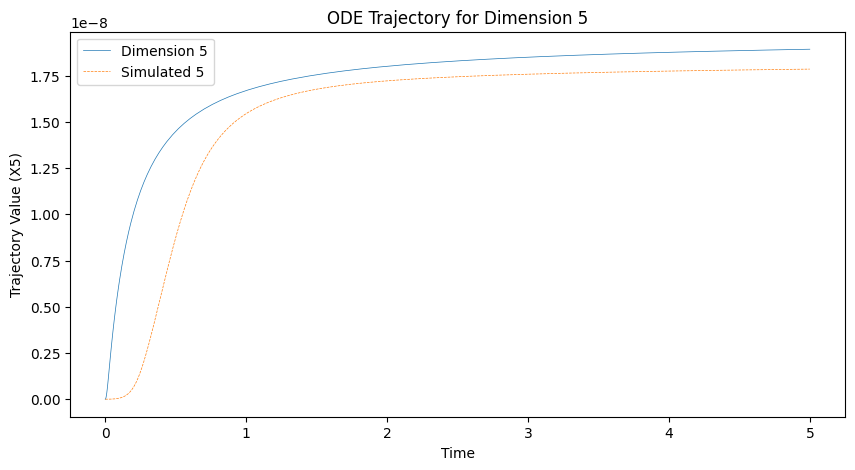

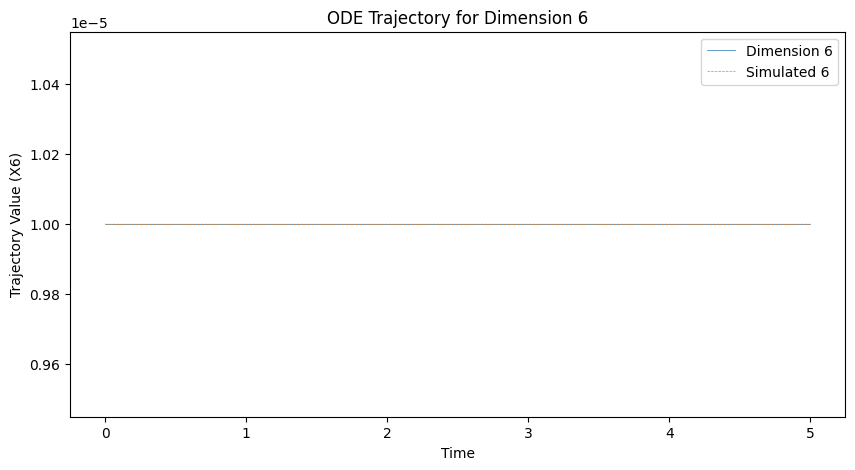

In [122]:
for i in range(X.shape[1]):
    plt.figure(figsize=(10, 5))
    # plt.plot(t_train, X[:, i], label=f"Dimension {i+1}", lw=0.5)
    plt.plot(data.t, X[:, i], label=f"Dimension {i+1}", lw=0.5)
    plt.plot(t_train, simulated_data[:, i], label=f"Simulated {i+1}", lw=0.5, linestyle='--')
    plt.xlabel("Time")
    plt.ylabel(f"Trajectory Value (X{i+1})")
    plt.title(f"ODE Trajectory for Dimension {i+1}")
    plt.legend()
    plt.show()